<a href="https://colab.research.google.com/github/Pooja-Arumugam/Customer-Churn-Analysis-and-Prediction/blob/main/Global_Renewable_Energy_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data = pd.read_csv('/content/drive/MyDrive/datathon/complete_renewable_energy_dataset.csv')

In [41]:
data

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0


In [42]:
df = pd.read_csv('/content/drive/MyDrive/datathon/complete_renewable_energy_dataset.csv')

In [43]:
df = df.drop_duplicates()

In [44]:

# 2. Standardize categorical values
df['Country'] = df['Country'].str.strip().str.title()
df['Energy Type'] = df['Energy Type'].str.strip().str.capitalize()

In [45]:
df.to_csv("cleaned_renewable_energy_dataset.csv", index=False)

print("Dataset cleaned and saved successfully!")

Dataset cleaned and saved successfully!


In [46]:
missing_values = df.isnull().sum()
print("Missing values in dataset:")
print(missing_values[missing_values > 0])

Missing values in dataset:
Series([], dtype: int64)


In [47]:
df=pd.read_csv('/content/cleaned_renewable_energy_dataset.csv')

In [50]:
# EDA Section

# Summary statistics
print("Summary Statistics:")
print(df.describe())



Summary Statistics:
              Year  Production (GWh)  Installed Capacity (MW)  \
count  2500.000000       2500.000000              2500.000000   
mean   2011.437600      48743.195073             24882.910674   
std       6.895471      28340.915147             14463.459958   
min    2000.000000       1053.354158               114.531639   
25%    2006.000000      24309.656479             12282.213159   
50%    2011.000000      47367.117600             24689.162460   
75%    2017.250000      73079.452832             37438.443570   
max    2023.000000      99937.503719             49997.387577   

       Investments (USD)    Population           GDP  Energy Consumption  \
count       2.500000e+03  2.500000e+03  2.500000e+03         2500.000000   
mean        4.956155e+09  7.458927e+08  1.010745e+14       495701.245158   
std         2.894789e+09  4.373146e+08  5.782363e+13       291419.017957   
min         5.886994e+06  1.255357e+06  5.603965e+10         1264.851083   
25%         2.

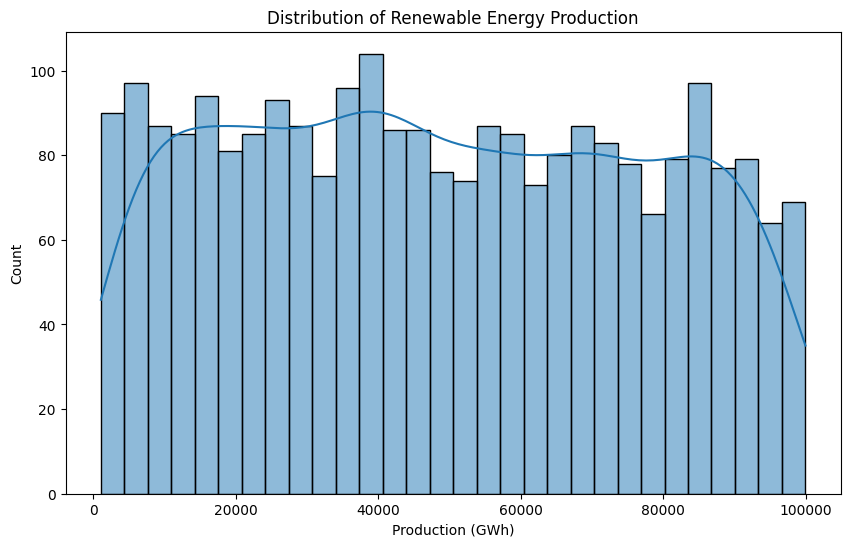

In [51]:
# Distribution plots of key numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['Production (GWh)'], bins=30, kde=True)
plt.title('Distribution of Renewable Energy Production')
plt.show()

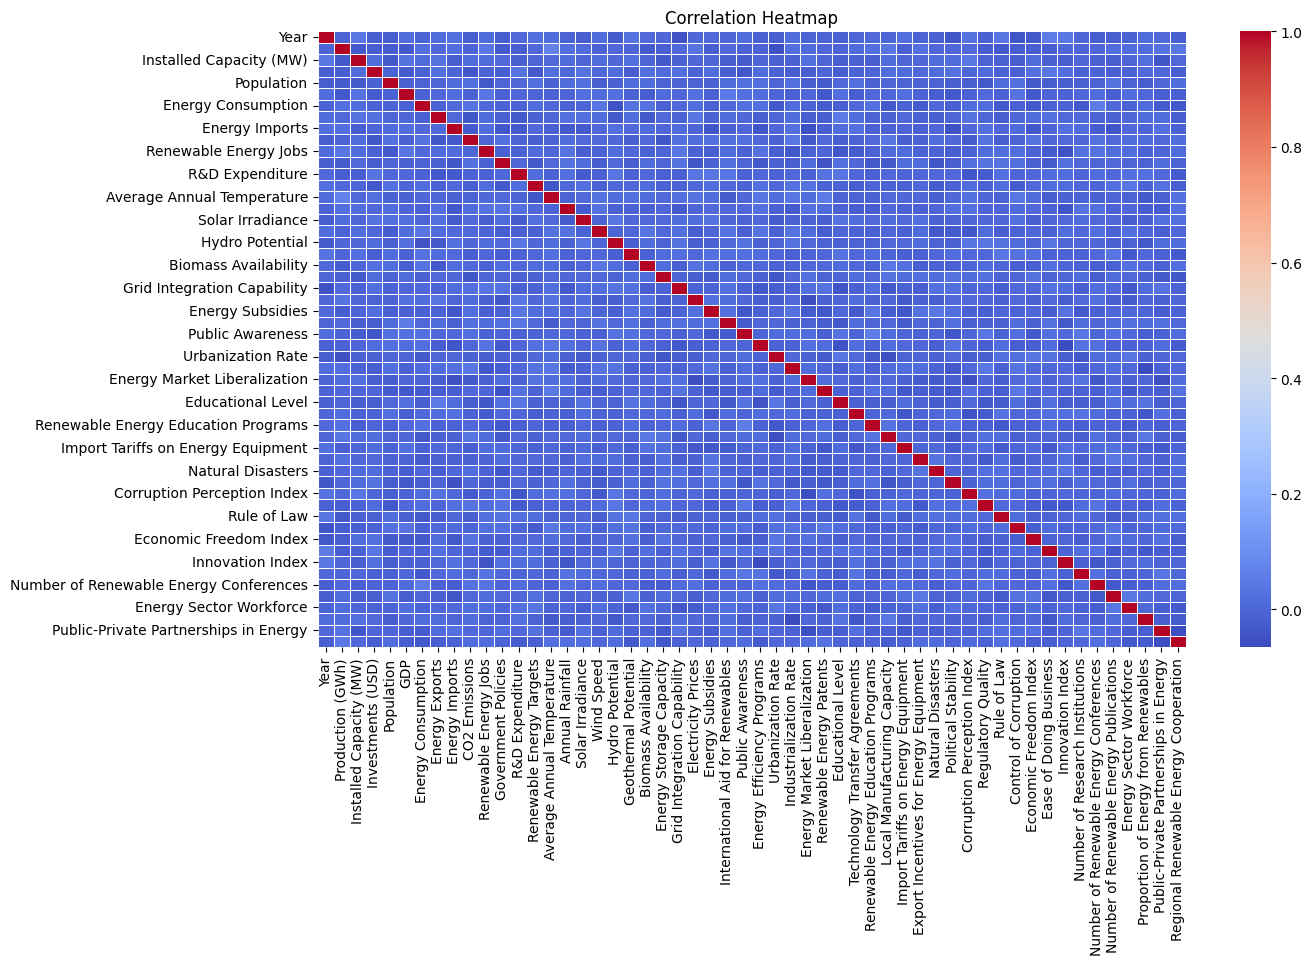

In [55]:
# Correlation heatmap (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64', 'float32'])
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
# Identify highly correlated variables
correlation_matrix = numeric_df.corr()
high_corr_pairs = (
    correlation_matrix.where((abs(correlation_matrix) > 0.6) & (abs(correlation_matrix) < 1.0))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Variable 1", "Variable 2", "Correlation"]
print("Highly Correlated Variables (Threshold > 0.6):")
print(high_corr_pairs.sort_values(by="Correlation", ascending=False))


Highly Correlated Variables (Threshold > 0.6):
Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


<ipython-input-61-f77567b3a884>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


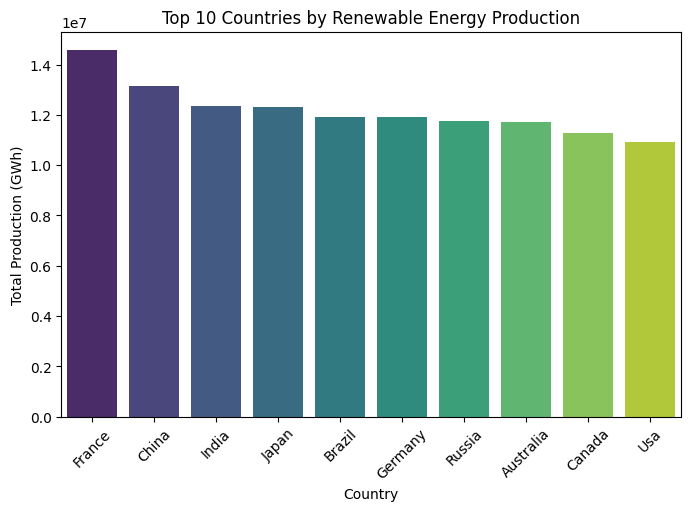

In [61]:
# Top 10 energy-producing countries
top_countries = df.groupby('Country')['Production (GWh)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Renewable Energy Production')
plt.ylabel('Total Production (GWh)')
plt.show()





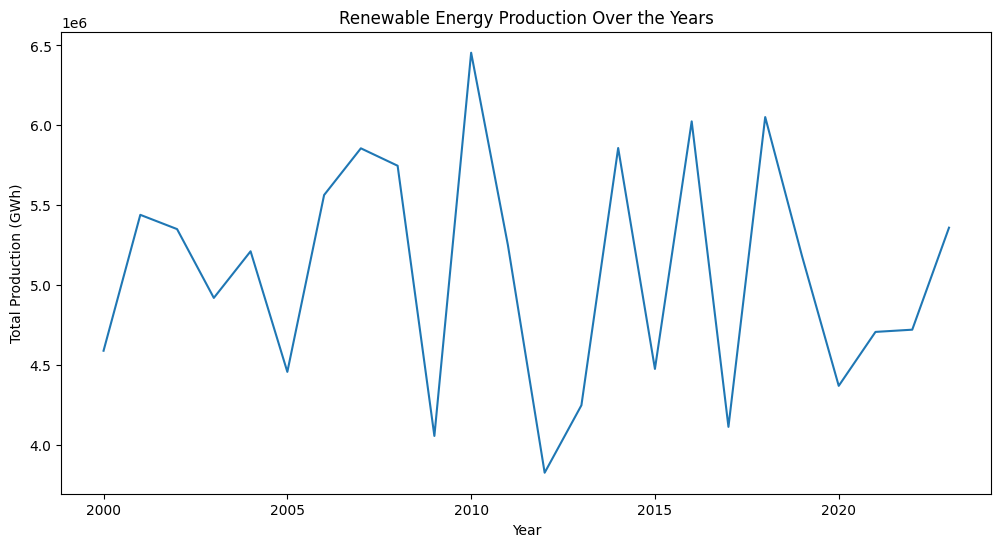

In [58]:
# Trend analysis over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Production (GWh)'].sum())
plt.title('Renewable Energy Production Over the Years')
plt.ylabel('Total Production (GWh)')
plt.show()